**Decision Tree** is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

**Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

In [ ]:
import pandas as pd

data = {
    "Day" : [1,2,3,4,5,6,7,8,9,10],
    "Weather" : ["Sunny", "Cloudy", "Sunny", "Cloudy", "Rainy", "Rainy", "Rainy", "Sunny", "Cloudy", "Rainy"],
    "Temperature" : ["Hot", "Hot", "Mild", "Mild", "Mild", "Cool", "Mild", "Hot", "Hot", "Mild"],
    "Humidity" : ["High", "High", "Normal", "High", "High", "Normal","High", "High", "Normal", "High"],
    "Wind" : ["Weak", "Weak", "Strong", "Strong", "Strong", "Strong",  "Weak", "Strong", "Weak", "Strong" ],
    "Play" : ["No", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No"]
}

data = pd.DataFrame(data)

In [ ]:
data

,Day,Weather,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No
5,6,Rainy,Cool,Normal,Strong,No
6,7,Rainy,Mild,High,Weak,Yes
7,8,Sunny,Hot,High,Strong,No
8,9,Cloudy,Hot,Normal,Weak,Yes
9,10,Rainy,Mild,High,Strong,No


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)

feature_cols = ["Weather", "Temperature","Humidity","Wind"]
X = data[feature_cols] # Features
y = data.Play # Target variable

In [ ]:
X

,Weather,Temperature,Humidity,Wind
0,2,1,0,1
1,0,1,0,1
2,2,2,1,0
3,0,2,0,0
4,1,2,0,0
5,1,0,1,0
6,1,2,0,1
7,2,1,0,0
8,0,1,1,1
9,1,2,0,0


In [ ]:
y

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    1
9    0
Name: Play, dtype: int64

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier().fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print(X_train,"\n",y_train)

   Weather  Temperature  Humidity  Wind
5        1            0         1     0
4        1            2         0     0
2        2            2         1     0
0        2            1         0     1
3        0            2         0     0
9        1            2         0     0
8        0            1         1     1 
 5    0
4    0
2    1
0    0
3    1
9    0
8    1
Name: Play, dtype: int64


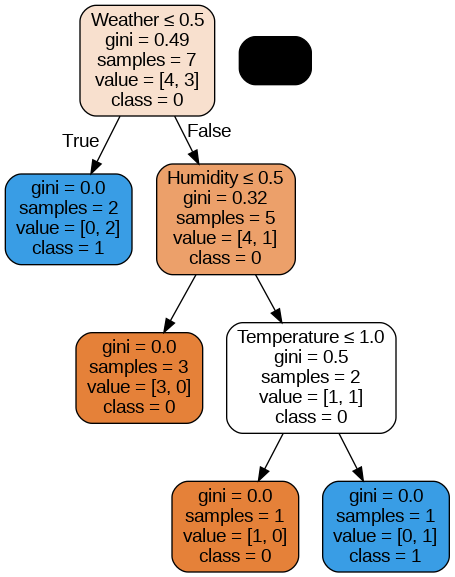

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('play.png')
Image(graph.create_png())

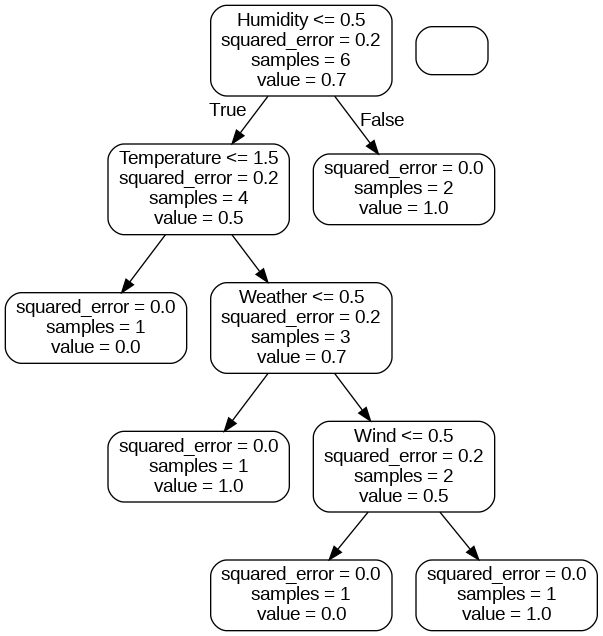

In [ ]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.251)

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10).fit(X_train,y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image(graph.create_png())

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


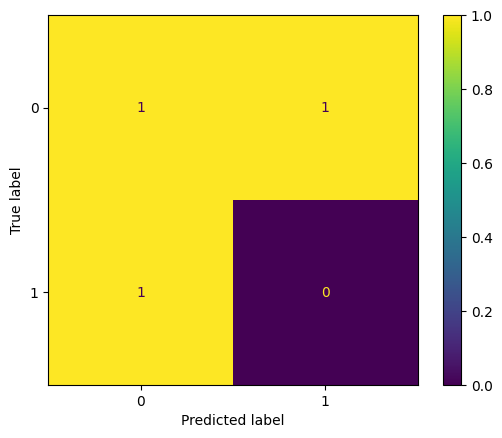

In [ ]:
# Generate predictions with the best model
y_pred = tree_small.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.3333333333333333
Precision: 0.0
Recall: 0.0
